# GRIP-SPARK FOUNDATION INTERNSHIP PROGRAM

# Name: M. Baqar Raza

# Task-3: Exploratory Data Analysis-Sample Superstore


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv(r"C:\Users\baqar\Desktop\GRIP-Spark Foundation\SampleSuperstore.csv")

In [6]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.shape

(9994, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
data.duplicated().sum()

17

In [13]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

C:\Users\baqar\AppData\Local\Temp\ipykernel_9868\2191512894.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

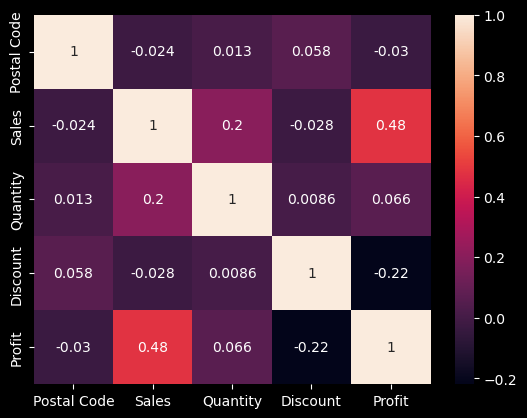

In [14]:
from matplotlib import style
style.use("dark_background")
corr=data.corr()
sns.heatmap(corr, annot= True)

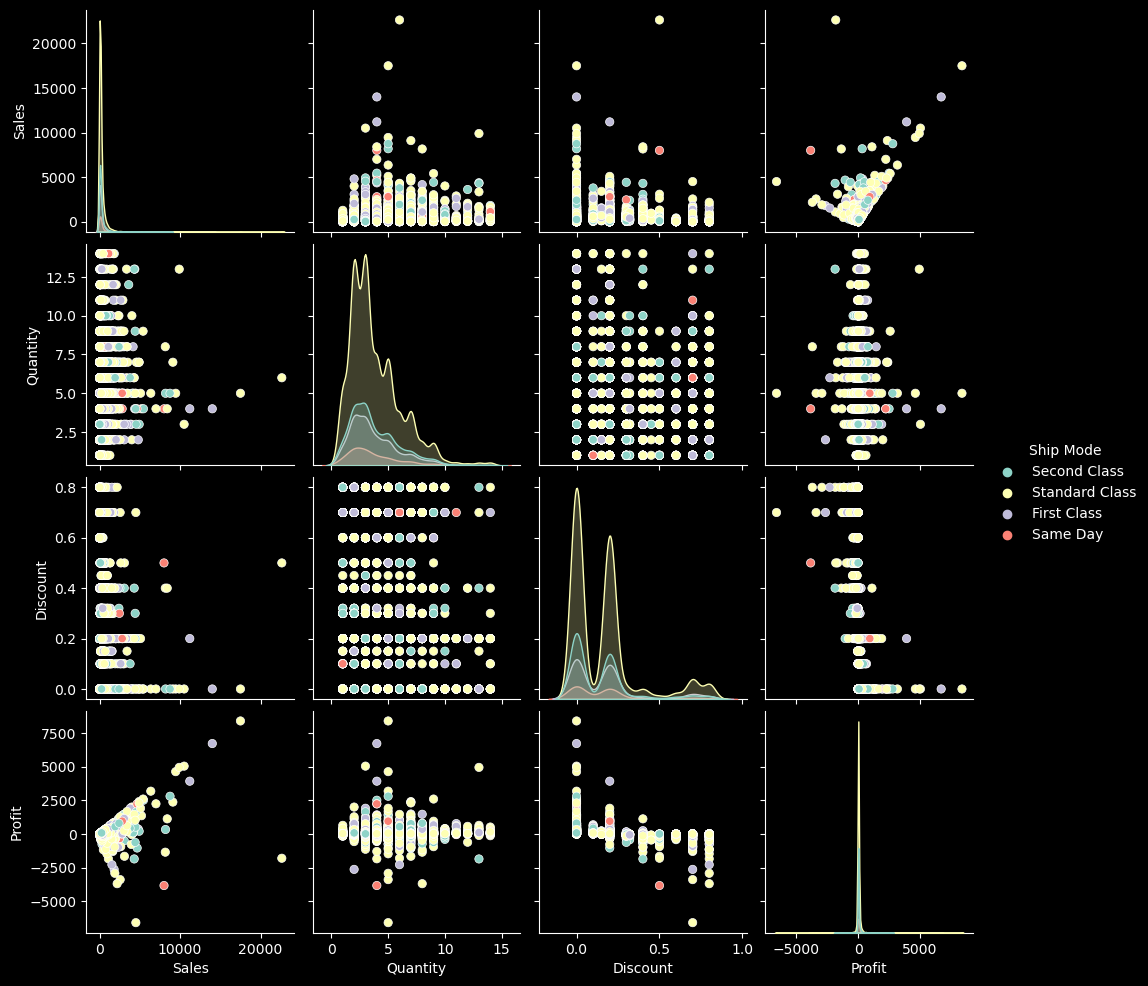

In [15]:
df = data.drop(['Postal Code'], axis =1)
sns.pairplot(df, hue='Ship Mode')

<Axes: xlabel='Segment', ylabel='count'>

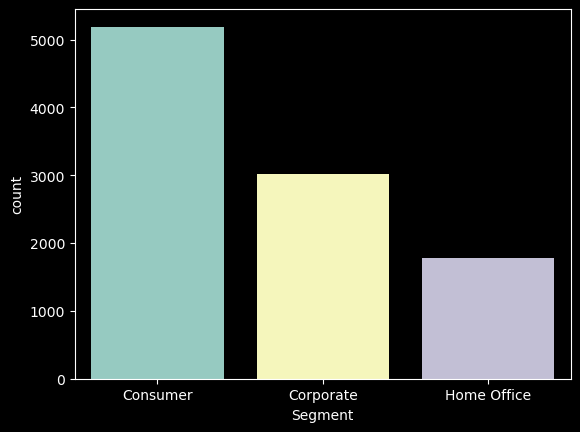

In [16]:
sns.countplot(x="Segment",data=df)

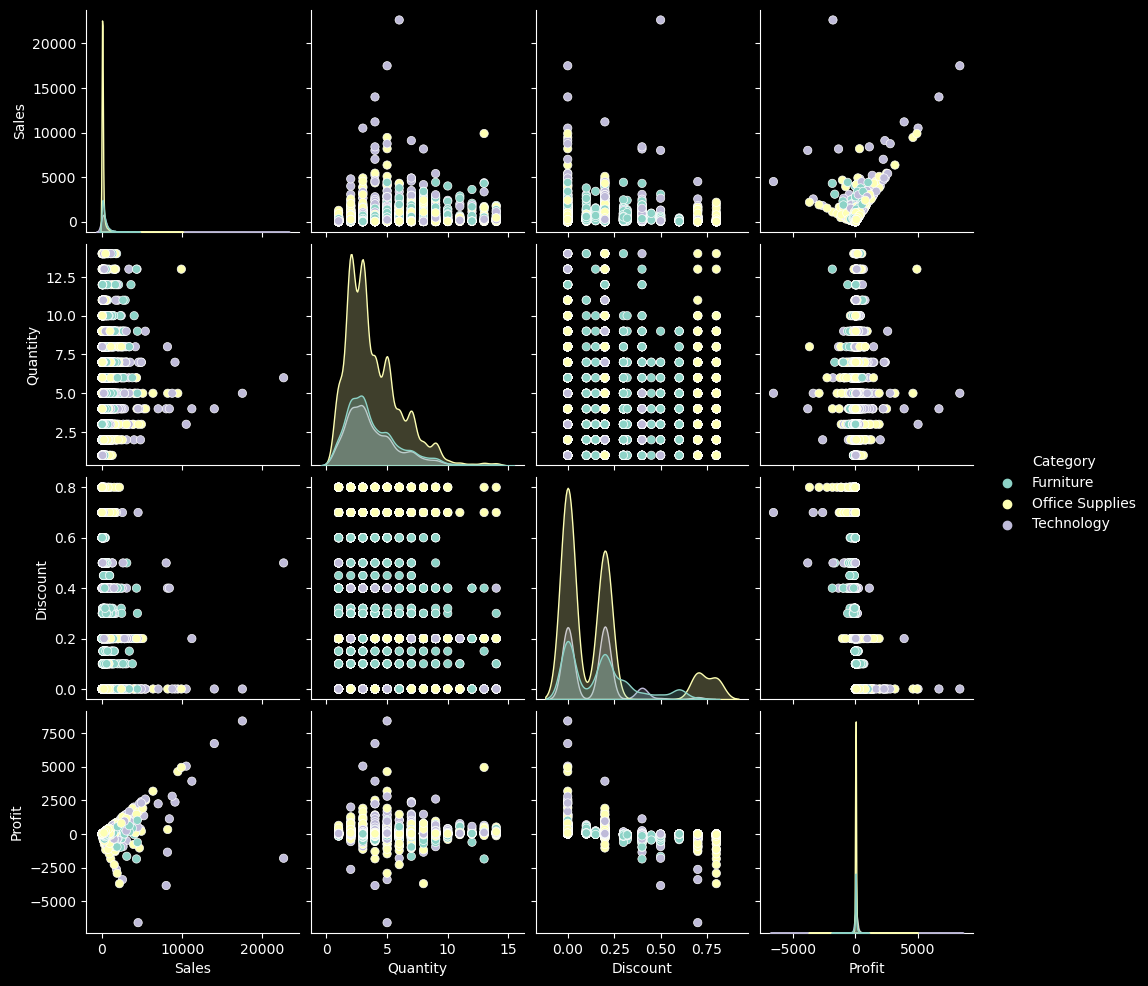

In [17]:
sns.pairplot(df,hue="Category")

In [18]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [19]:
df["Sub-Category"].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

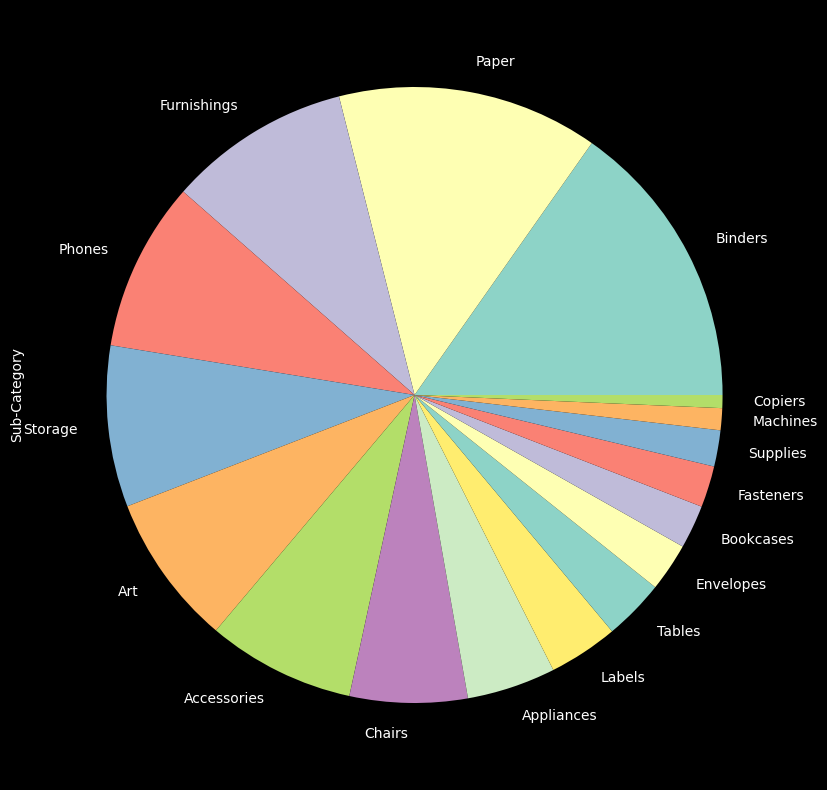

In [20]:
plt.figure(figsize=(12,10))
df["Sub-Category"].value_counts().plot.pie()
plt.show()

In [22]:
df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

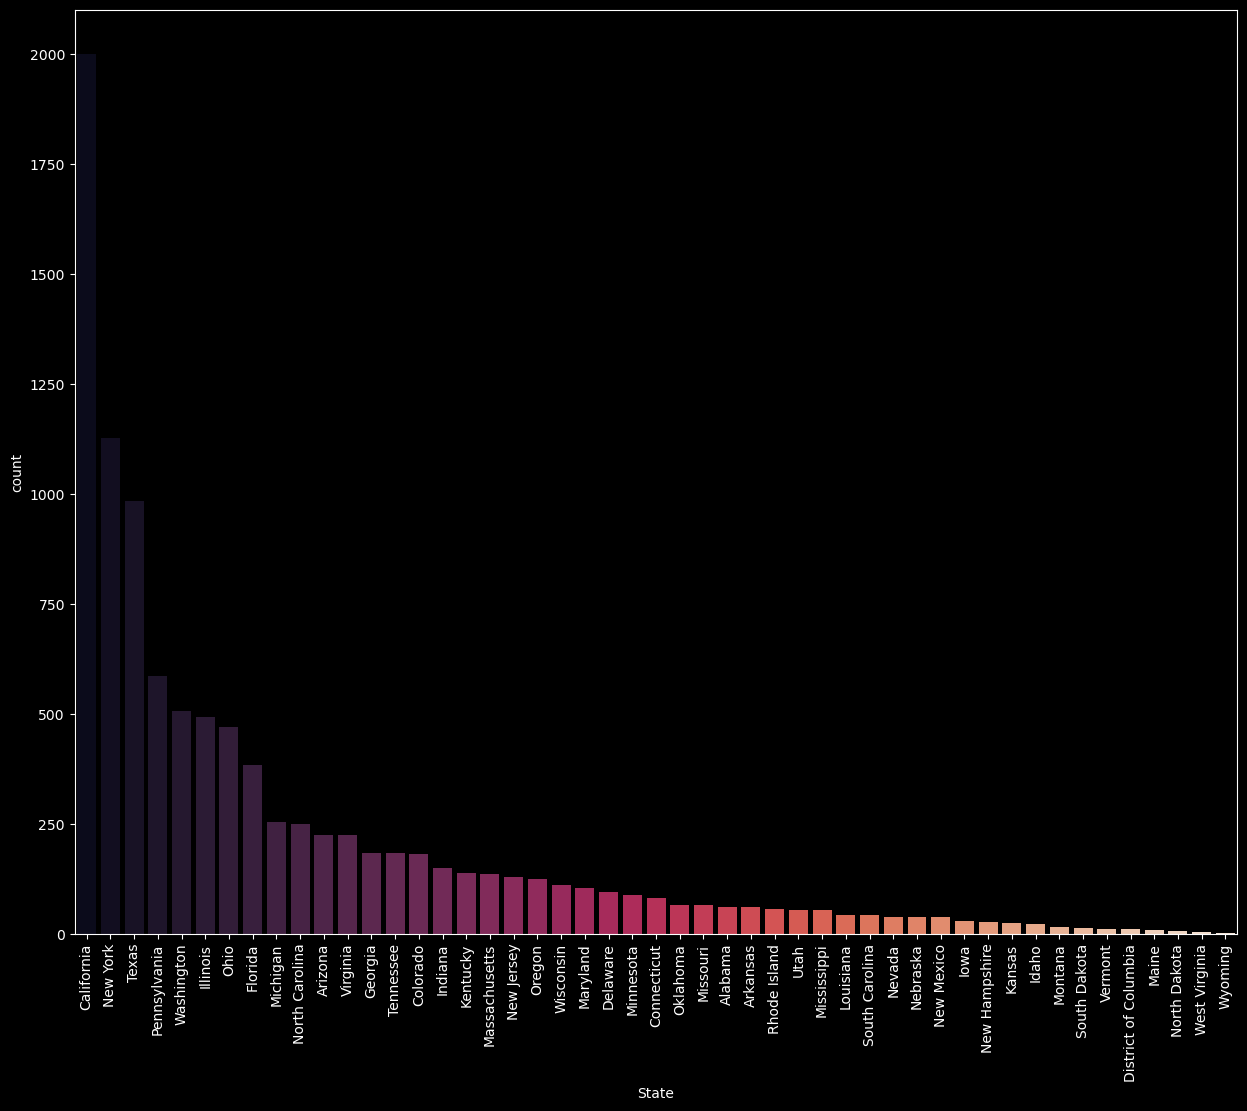

In [23]:
plt.figure(figsize=(15,12))
sns.countplot(x="State",data=df,palette="rocket",order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

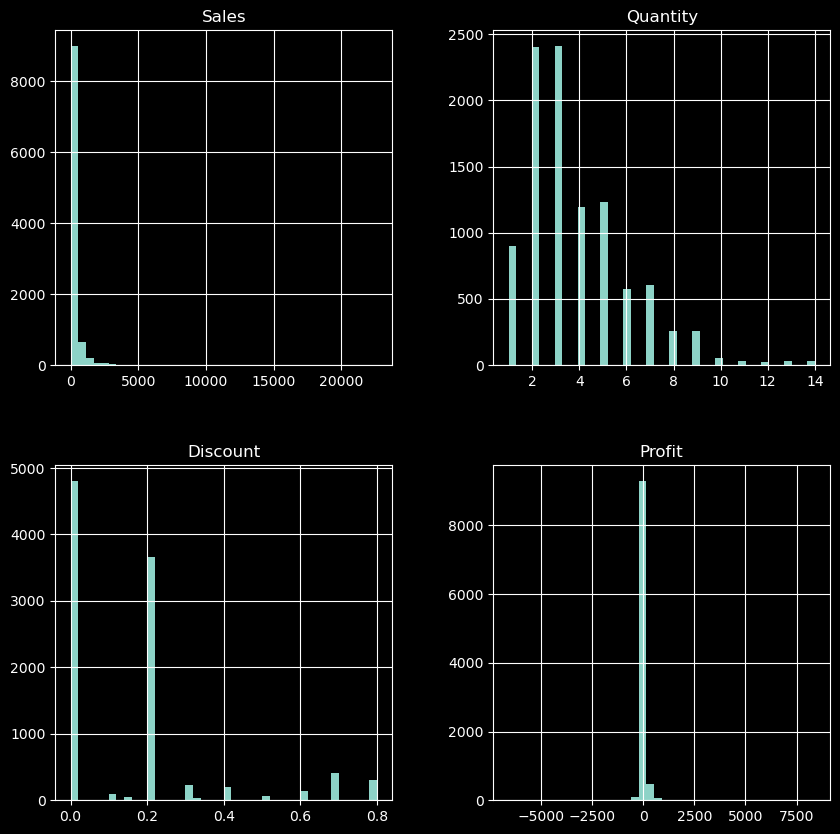

In [24]:
df.hist(figsize=(10,10),bins=40)
plt.show()

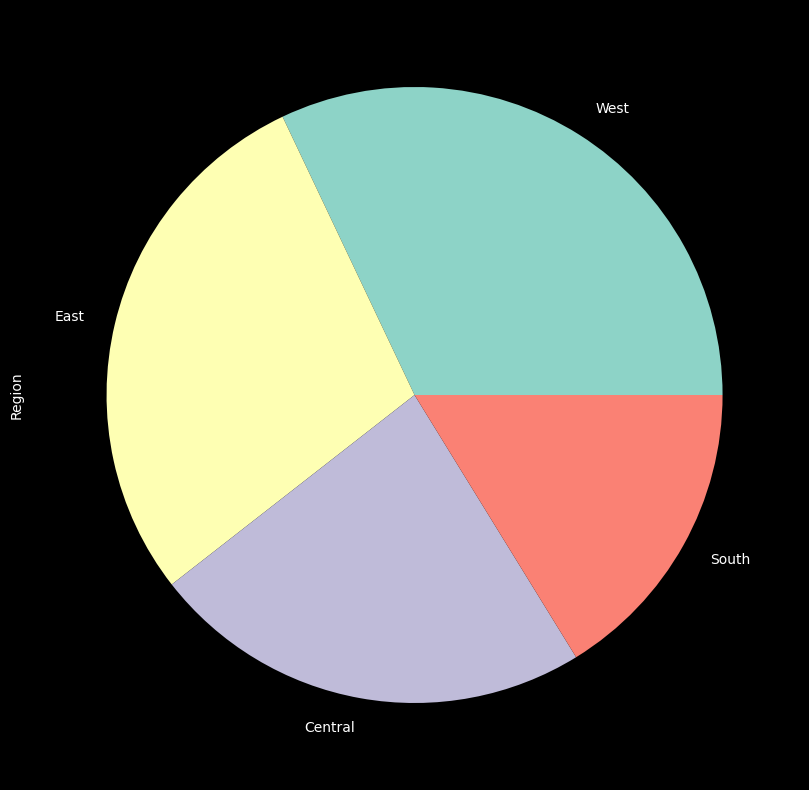

In [25]:
plt.figure(figsize=(10,10))
df['Region'].value_counts().plot.pie()
plt.show()

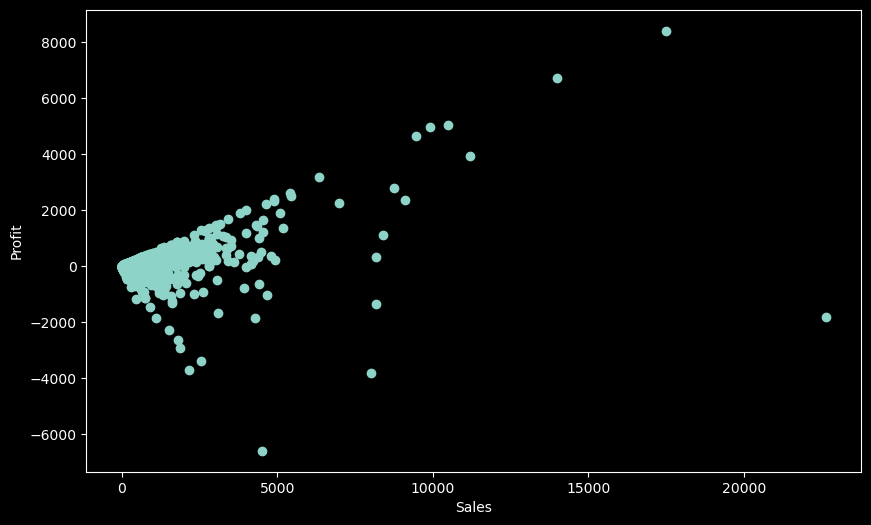

In [26]:
from matplotlib import style
style.use('dark_background')
plt.figure(figsize=(10,6))
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

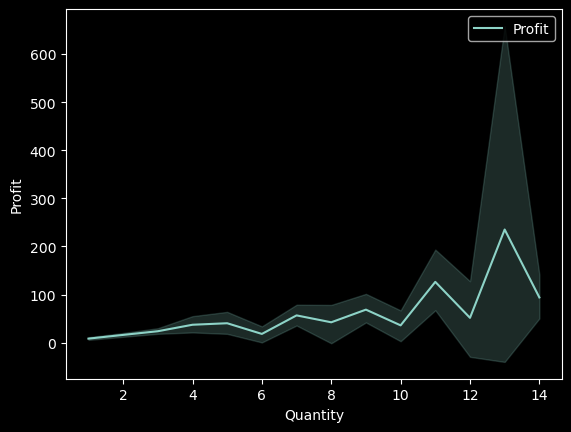

In [27]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

<Axes: xlabel='Segment', ylabel='profit/loss vs sales'>

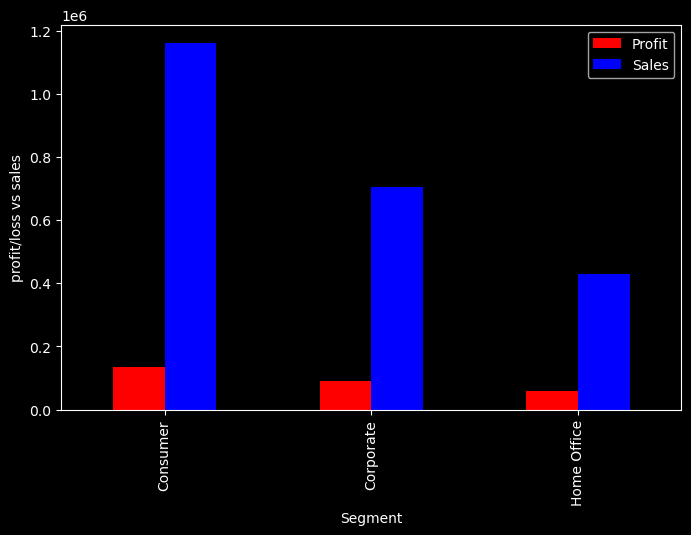

In [28]:
df.groupby("Segment")[['Profit','Sales']].sum().plot.bar(color=["red","blue"],figsize=(8,5),ylabel="profit/loss vs sales")


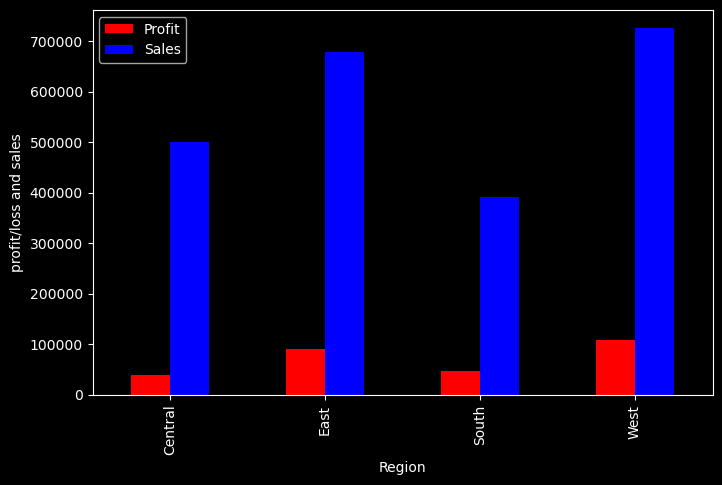

In [29]:
df.groupby('Region')[["Profit","Sales"]].sum().plot.bar(color=["red","blue"],figsize=(8,5))
plt.ylabel("profit/loss and sales")
plt.show()

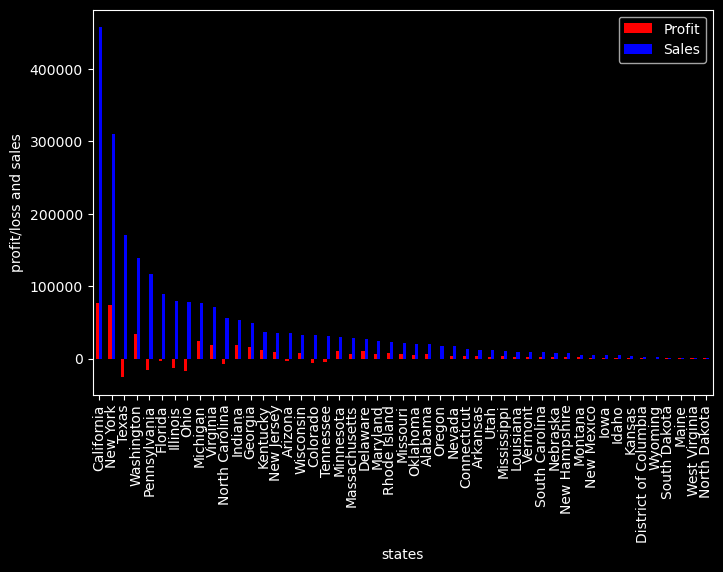

In [30]:
df.groupby('State')[["Profit","Sales"]].sum().sort_values(by="Sales",ascending=False).plot.bar(color=["red","blue"],figsize=(8,5))
plt.ylabel("profit/loss and sales")
plt.xlabel("states")
plt.ylabel("profit/loss and sales")
plt.title
plt.show()

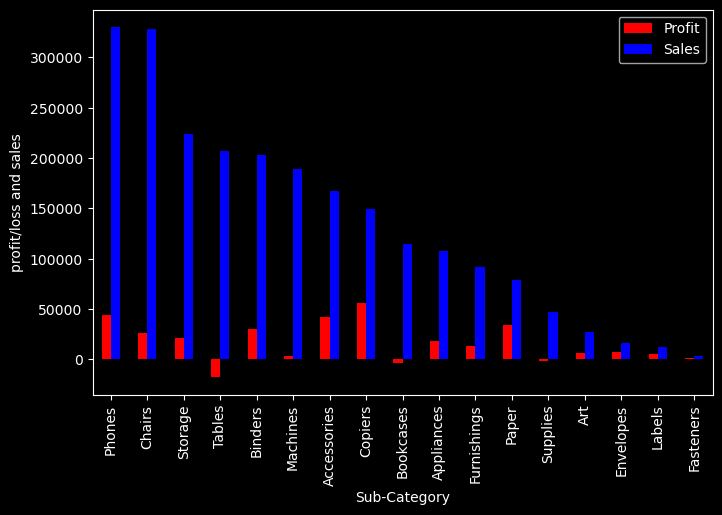

In [31]:
df.groupby('Sub-Category')[["Profit","Sales"]].sum().sort_values(by="Sales",ascending=False).plot.bar(color=["red","blue"],figsize=(8,5))
plt.ylabel("profit/loss and sales")
plt.show()